In [1]:
import numpy as np, pandas as pd
import os,glob, re
%matplotlib inline

dfs = {re.search('/([^/\.]*)\.csv', fn).group(1):pd.read_csv(fn) for fn in glob.glob(os.getcwd()+'/Raw/*.csv')}
print('data frames read:{}'.format(list(dfs.keys())))

print('local variables with the same names are created.')
for k, v in dfs.items(): locals()[k] = v

data frames read:['air_reserve', 'air_store_info', 'air_visit_data', 'date_info', 'hpg_reserve', 'hpg_store_info', 'sample_submission', 'store_id_relation']
local variables with the same names are created.


In [2]:
air_reserve.head()

,air_store_id,visit_datetime,reserve_datetime,reserve_visitors
0,air_877f79706adbfb06,2016-01-01 19:00:00,2016-01-01 16:00:00,1
1,air_db4b38ebe7a7ceff,2016-01-01 19:00:00,2016-01-01 19:00:00,3
2,air_db4b38ebe7a7ceff,2016-01-01 19:00:00,2016-01-01 19:00:00,6
3,air_877f79706adbfb06,2016-01-01 20:00:00,2016-01-01 16:00:00,2
4,air_db80363d35f10926,2016-01-01 20:00:00,2016-01-01 01:00:00,5


In [3]:
air_reserve['visit_datetime']  = pd.to_datetime(air_reserve['visit_datetime'])
air_reserve['reserve_datetime'] = pd.to_datetime(air_reserve['reserve_datetime']) 
air_reserve['day_diff']  = (air_reserve['visit_datetime'] - air_reserve['reserve_datetime']).dt.days
air_reserve['time_diff']  = abs(air_reserve['visit_datetime'] - air_reserve['reserve_datetime']).astype('timedelta64[h]')
air_reserve.head()

,air_store_id,visit_datetime,reserve_datetime,reserve_visitors,day_diff,time_diff
0,air_877f79706adbfb06,2016-01-01 19:00:00,2016-01-01 16:00:00,1,0,3.0
1,air_db4b38ebe7a7ceff,2016-01-01 19:00:00,2016-01-01 19:00:00,3,0,0.0
2,air_db4b38ebe7a7ceff,2016-01-01 19:00:00,2016-01-01 19:00:00,6,0,0.0
3,air_877f79706adbfb06,2016-01-01 20:00:00,2016-01-01 16:00:00,2,0,4.0
4,air_db80363d35f10926,2016-01-01 20:00:00,2016-01-01 01:00:00,5,0,19.0


In [4]:
air_reserve.dtypes

air_store_id                object
visit_datetime      datetime64[ns]
reserve_datetime    datetime64[ns]
reserve_visitors             int64
day_diff                     int64
time_diff                  float64
dtype: object

In [25]:
def get_meal_type(hr):    
    if hr > 6 and hr <= 11:
        return 'breakfast'
    if hr >11 and hr <= 17:
        return 'lunch'
    if hr >17 and hr <= 23:
        return 'dinner'
    return 'midnight'
    
air_reserve['meal_type'] = air_reserve['visit_datetime'].dt.hour.apply(lambda x: get_meal_type(x))

In [26]:
air_reserve['visit_date'] = air_reserve.visit_datetime.dt.date.astype(str)

In [27]:
raw_combined_data = air_visit_data.merge(air_reserve,how = 'outer',on = ['air_store_id','visit_date'])

In [28]:
combined_data = raw_combined_data.dropna()

In [29]:
combined_data.head()

,air_store_id,visit_date,visitors,visit_datetime,reserve_datetime,reserve_visitors,day_diff,time_diff,meal_type
1006,air_35512c42db0868da,2016-02-27,6.0,2016-02-27 22:00:00,2016-02-27 21:00:00,12.0,0.0,1.0,dinner
3744,air_ee3a01f0c71a769f,2016-01-04,61.0,2016-01-04 15:00:00,2016-01-04 11:00:00,2.0,0.0,4.0,lunch
3747,air_ee3a01f0c71a769f,2016-01-08,21.0,2016-01-08 19:00:00,2016-01-06 14:00:00,3.0,2.0,53.0,dinner
3748,air_ee3a01f0c71a769f,2016-01-09,57.0,2016-01-09 11:00:00,2016-01-06 13:00:00,1.0,2.0,70.0,breakfast
3749,air_ee3a01f0c71a769f,2016-01-09,57.0,2016-01-09 11:00:00,2016-01-07 19:00:00,2.0,1.0,40.0,breakfast


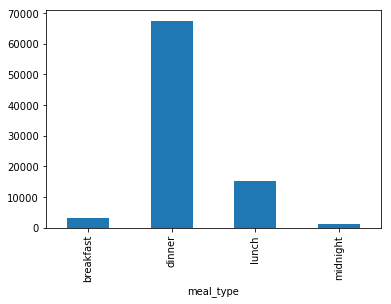

In [31]:
combined_data.groupby(['meal_type'])['air_store_id'].count().plot(kind = 'bar')

In [50]:
meal_info =combined_data.groupby(['air_store_id','meal_type'])['meal_type'].count().unstack('air_store_id').T.fillna(0)
meal_info.head()#.plot(kind='bar', stacked=True)#['air_store_id']].plot(kind='bar', stacked=True)

meal_type,breakfast,dinner,lunch,midnight
air_store_id,,,,
air_00a91d42b08b08d9,0.0,10.0,2.0,0.0
air_0164b9927d20bcc3,0.0,138.0,1.0,5.0
air_034a3d5b40d5b1b1,0.0,6.0,8.0,0.0
air_03963426c9312048,0.0,749.0,490.0,0.0
air_04341b588bde96cd,0.0,10.0,1.0,1.0
